In [1]:
%load_ext autoreload
%autoreload 2

import litelearn as ll
import seaborn as sns

# regression

the following cols contain null values and will be filled naively:
numerical columns:
[]
categorical columns:
['sex']
sex - mode: Male
casting species onto category
casting island onto category
casting sex onto category
None
using categories: ['species', 'island', 'sex']


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.040673
0:	learn: 756.3330713	test: 820.7875873	best: 820.7875873 (0)	total: 20.9ms	remaining: 20.8s
1:	learn: 733.6599572	test: 796.3602673	best: 796.3602673 (1)	total: 57.6ms	remaining: 28.8s
2:	learn: 710.9723484	test: 772.7878270	best: 772.7878270 (2)	total: 82.2ms	remaining: 27.3s
3:	learn: 690.5738732	test: 751.2940205	best: 751.2940205 (3)	total: 122ms	remaining: 30.3s
4:	learn: 672.3878189	test: 730.8790602	best: 730.8790602 (4)	total: 157ms	remaining: 31.3s
5:	learn: 653.1866786	test: 710.4305684	best: 710.4305684 (5)	total: 183ms	remaining: 30.4s
6:	learn: 635.6536741	test: 692.1047130	best: 692.1047130 (6)	total: 224ms	remaining: 31.8s
7:	learn: 618.6423460	test: 673.3118453	best: 673.3118453 (7)	total: 263ms	remaining: 32.7s
8:	learn: 604.6471430	test: 658.0213983	best: 658.0213983 (8)	total: 287ms	remaining: 31.6s
9:	learn: 589.1974957	test: 641.5807014	best: 641.5807014 (9)	total: 328ms	remaining: 32.5s
10:	learn: 574.2437336	test: 625.2794367	best: 

,rmse,support
train,245.998219,239
test,306.274648,103


,Feature Id,Importances
0,sex,42.838400
1,species,30.339900
2,flipper_length_mm,11.435730
3,bill_depth_mm,6.595040
4,bill_length_mm,5.231046
5,sex_is_missing,2.502917
6,island,1.056966


,rmse,support
train,245.998219,239
test,306.274648,103


,Feature Id,Importances
0,sex,42.838400
1,species,30.339900
2,flipper_length_mm,11.435730
3,bill_depth_mm,6.595040
4,bill_length_mm,5.231046
5,sex_is_missing,2.502917
6,island,1.056966


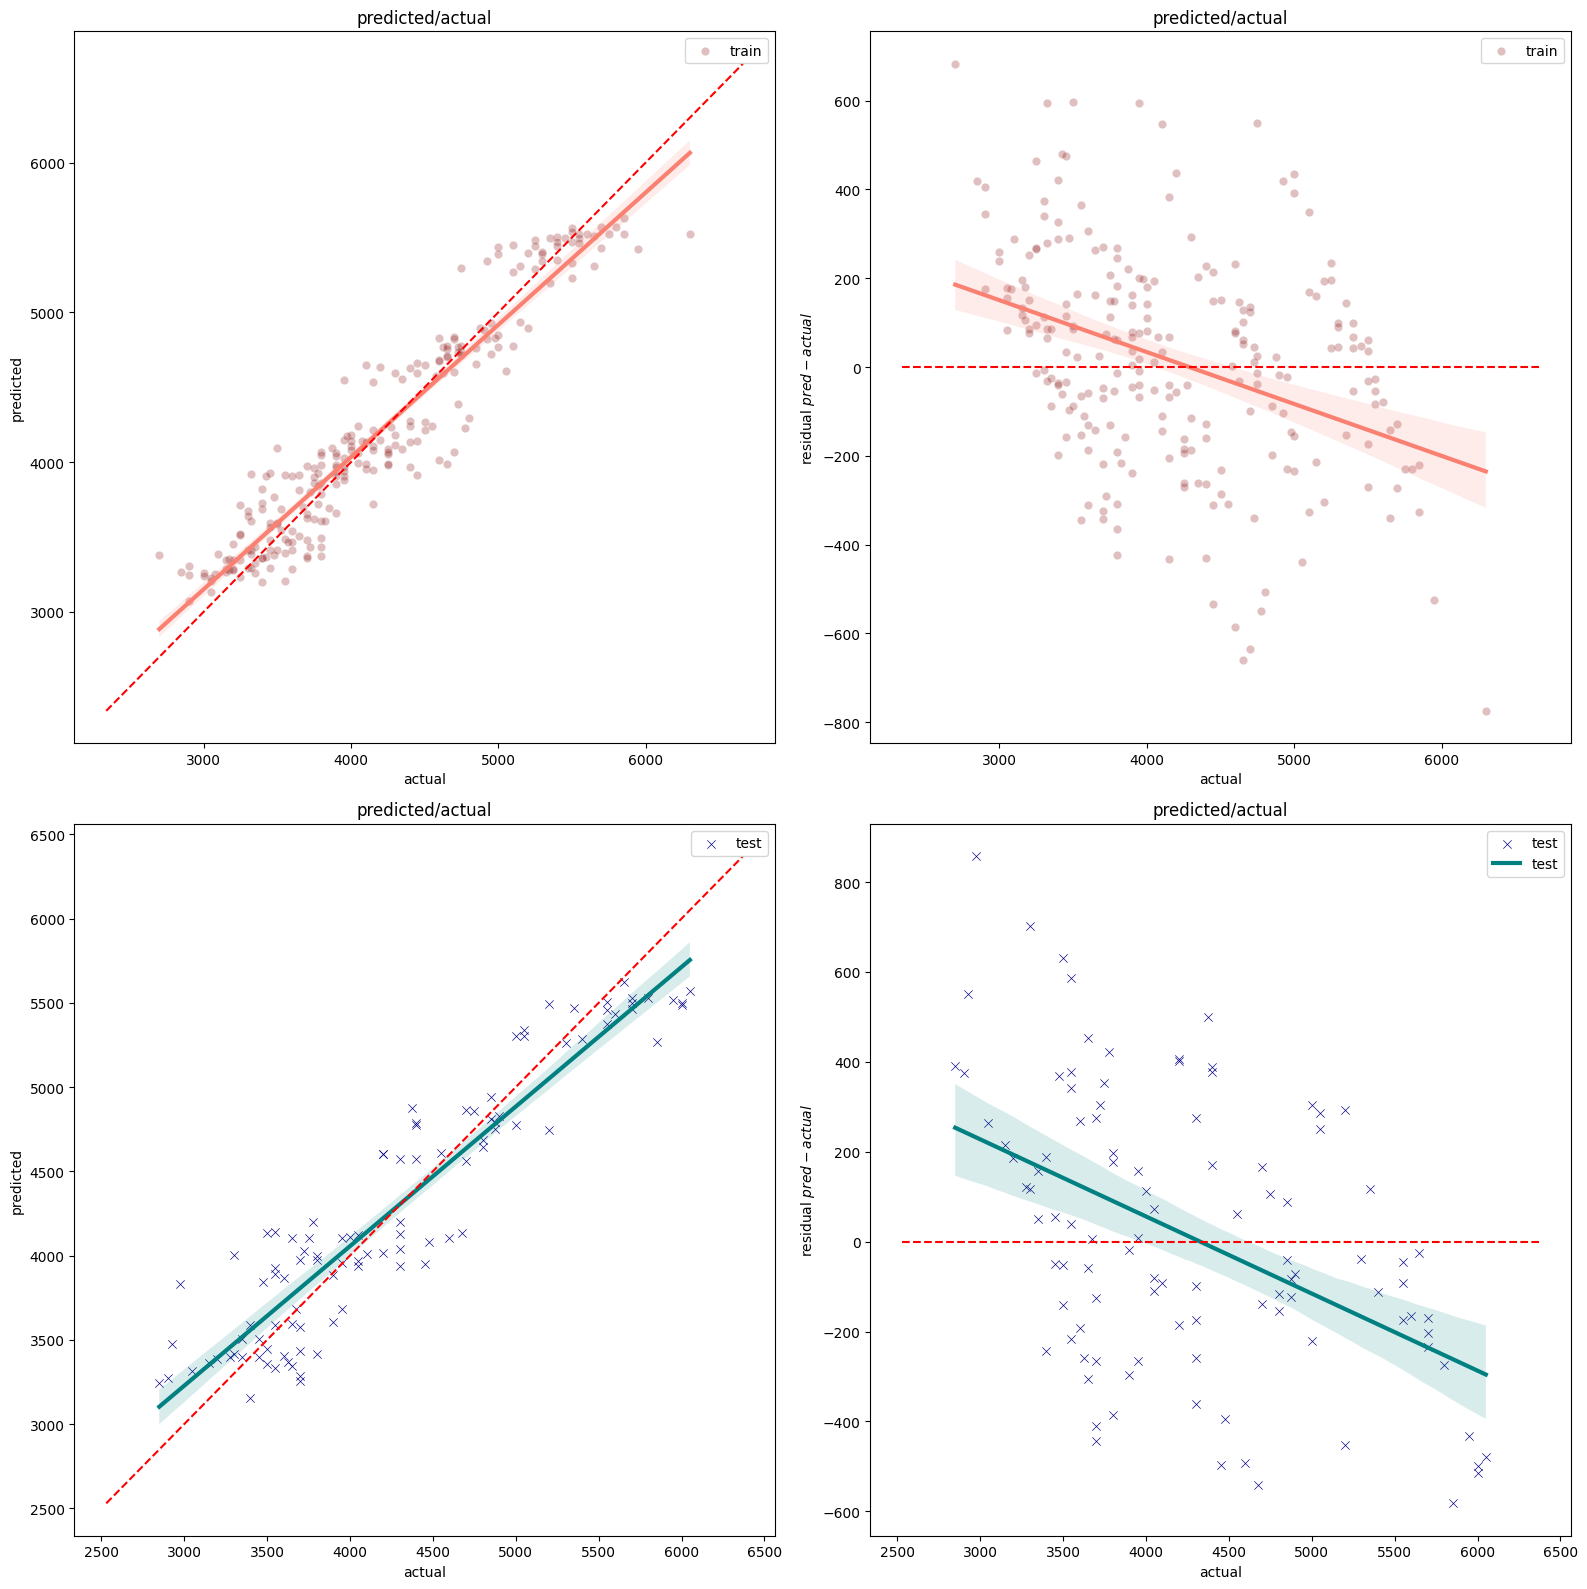

In [32]:
dataset = "penguins"
target = "body_mass_g"

df = sns.load_dataset(dataset)
df = df.dropna(subset=[target])
model = ll.core_regress_df(df, target)
result = model.get_evaluation()
model.display_evaluations()

In [4]:
model.display_feature_importance()

,Feature Id,Importances
0,species,33.730919
1,sex,28.510025
2,flipper_length_mm,15.687447
3,bill_depth_mm,9.694559
4,bill_length_mm,7.510131
5,island,4.226289
6,sex_is_missing,0.640629


,Feature Id,Importances
0,species,33.730919
1,sex,28.510025
2,flipper_length_mm,15.687447
3,bill_depth_mm,9.694559
4,bill_length_mm,7.510131
5,island,4.226289
6,sex_is_missing,0.640629


In [5]:
model.display_permutation_importance()

,mean,std
species,0.312279,0.023749
flipper_length_mm,0.280785,0.031338
sex,0.146771,0.031871
bill_length_mm,0.057958,0.012351
bill_depth_mm,0.051400,0.010830
island,0.044259,0.010580
sex_is_missing,-0.001814,0.001947


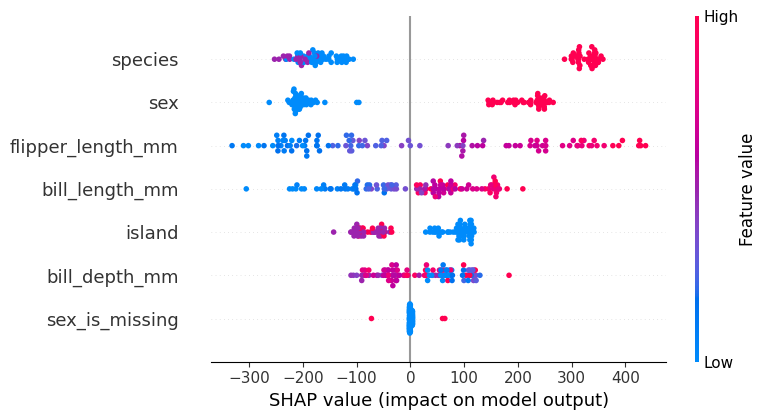

In [6]:
model.display_shap()

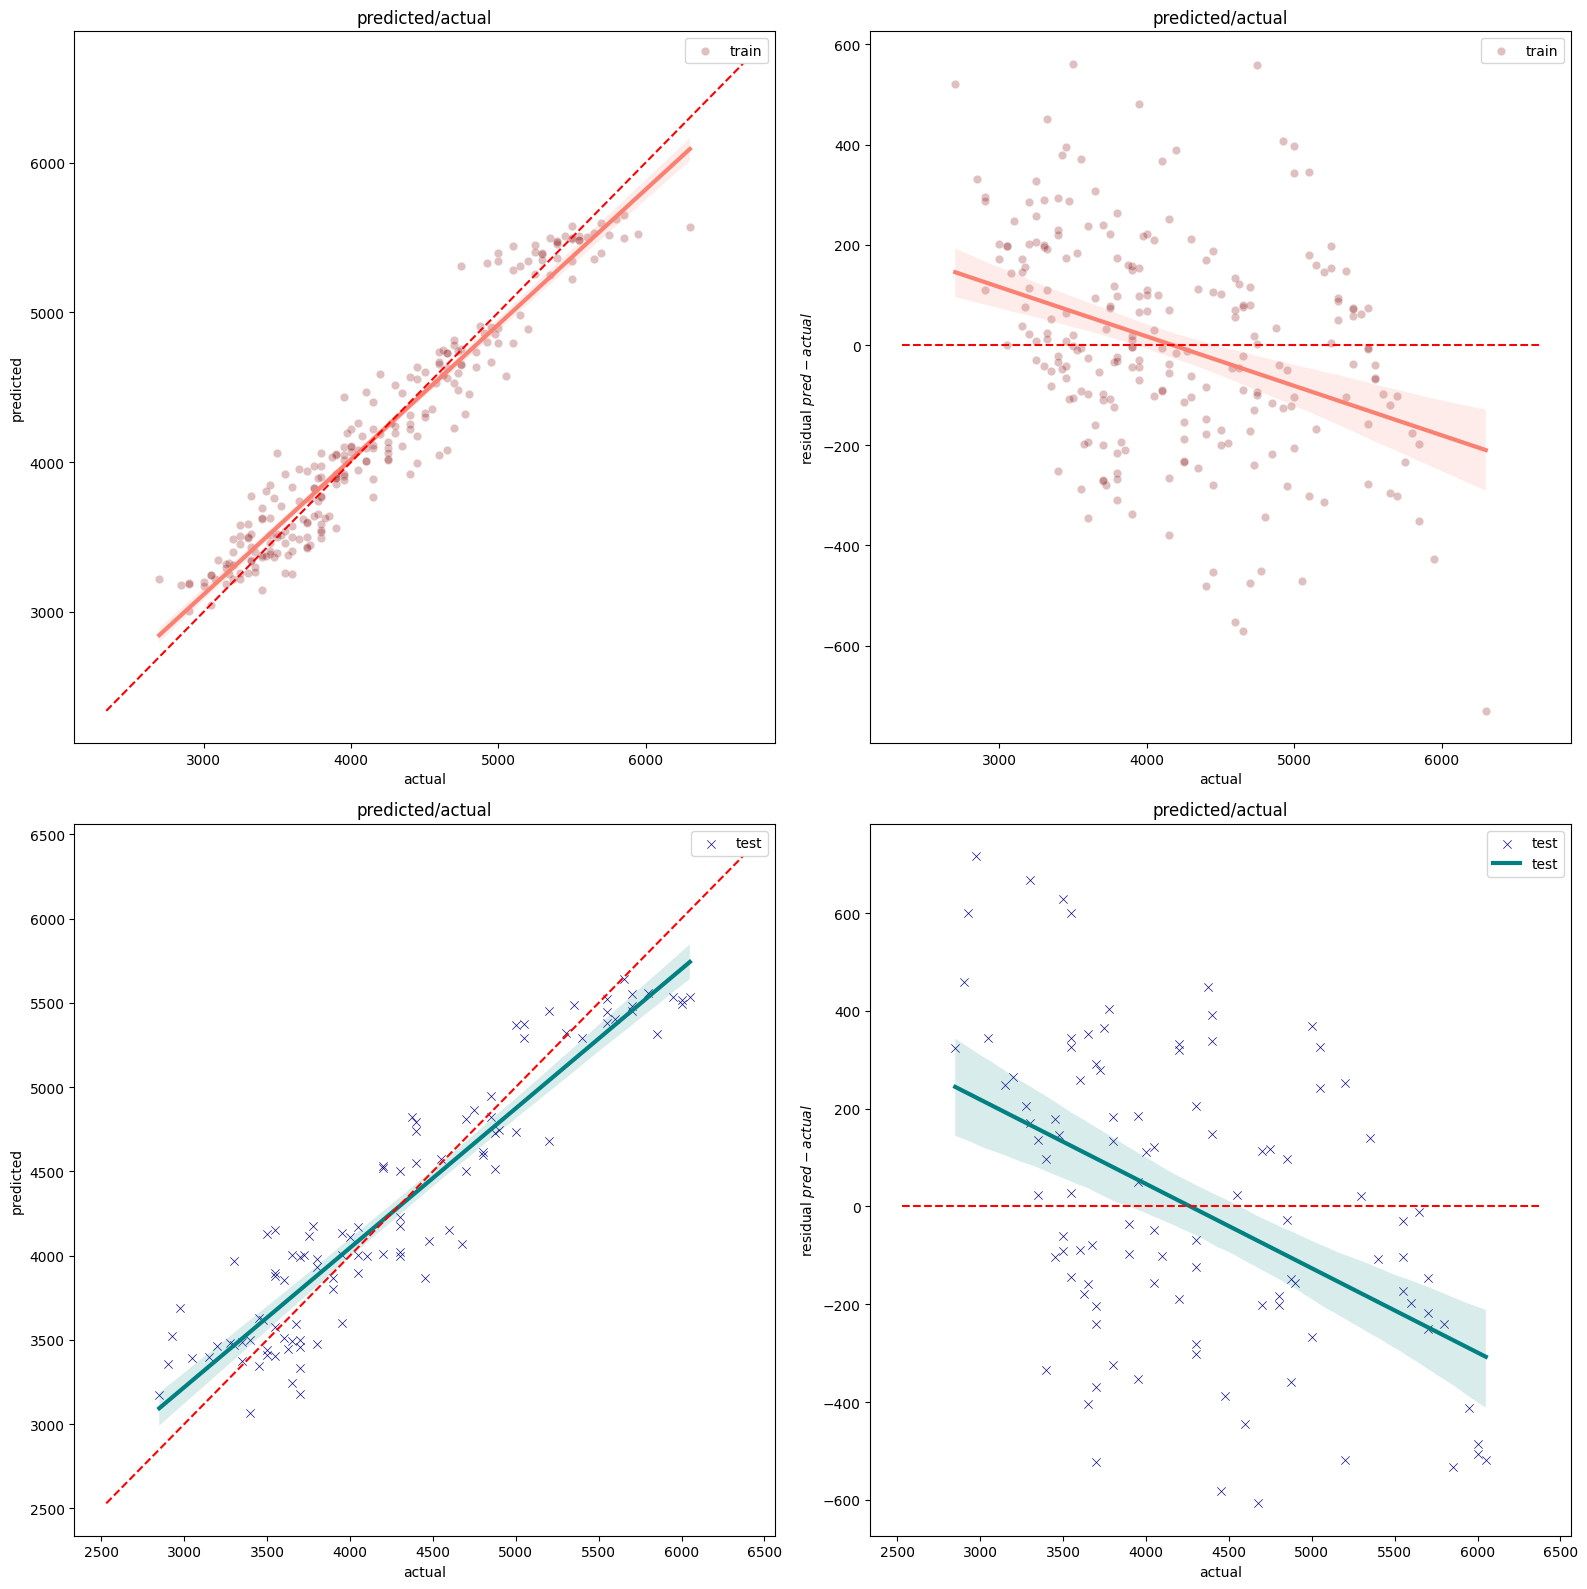

In [7]:
model.display_residuals()

In [8]:
reduced = model.progressive_permutation_feature_selection()

std= 1
threshold= 0
k= 5
std= 0
threshold= 0
k= 5
dropping columns:
                    mean       std  upper_estimate
sex_is_missing -0.001814  0.001947       -0.001814

[]
current performance:
             rmse  support
train  214.590700      239
test   304.209831      103

after dropping:
             rmse  support
train  209.778554      239
test   300.318437      103

error reduction (higher is better):
           rmse  support
train  4.812146        0
test   3.891394        0

std= -0.5
threshold= 0
k= 3
current performance:
             rmse  support
train  214.590700      239
test   304.209831      103

after dropping:
             rmse  support
train  209.778554      239
test   300.318437      103

error reduction (higher is better):
           rmse  support
train  4.812146        0
test   3.891394        0



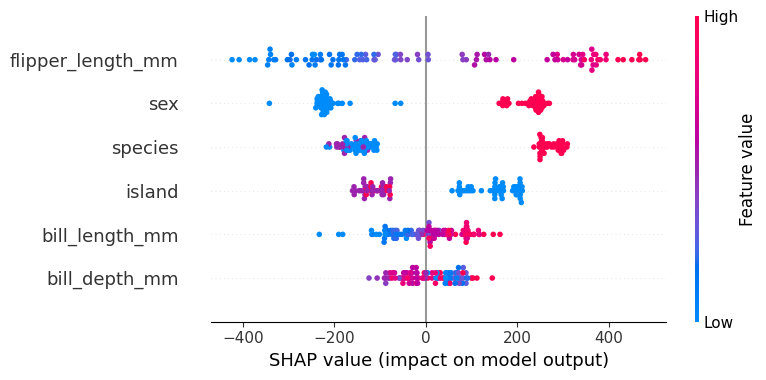

In [9]:
reduced[-1].display_shap()

In [15]:
model.train_frame.X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 336 to 297
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            103 non-null    category
 1   island             103 non-null    category
 2   bill_length_mm     103 non-null    float64 
 3   bill_depth_mm      103 non-null    float64 
 4   flipper_length_mm  103 non-null    float64 
 5   sex                103 non-null    int8    
 6   sex_is_missing     103 non-null    bool    
dtypes: bool(1), category(2), float64(3), int8(1)
memory usage: 7.9 KB
